In [61]:
#Imports
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib.path as mpath
import os
import glob
import pandas as pd
import xarray as xr
import netCDF4
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth
import cartopy.util as cutil
import logging
import utilities.funciones
import os, fnmatch
import utilities.sst_analysis 
import utilities.sst_EOF
from scipy import signal 

In [62]:
def plot_one_sst(sst,title,lons,lats,box,levels=np.arange(-.8,.8,0.1),cmap = 'RdBu_r'):

    fig = plt.figure(figsize=(10, 10),dpi=300,constrained_layout=True)
    data_crs = ccrs.PlateCarree()
    proj = ccrs.PlateCarree(central_longitude=180)
    ax1 = plt.subplot(1,1,1,projection=proj)
    im1=ax1.contourf(lons, lats, sst,levels,transform=data_crs,cmap=cmap,extend='both')
    ax1.set_title(utilities.funciones.split_title_line(title, max_words=5),fontsize=14)
    ax1.add_feature(cartopy.feature.COASTLINE,alpha=.5)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    ax1.set_extent([-60, 120, -20, 20], ccrs.PlateCarree(central_longitude=180))
    ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())

    x_start, x_end, y_start, y_end = box[0],box[1],box[2],box[3]
    margin = 0.07
    margin_fractions = np.array([margin, 1.0 - margin])
    x_lower, x_upper = x_start + (x_end - x_start)*margin_fractions
    y_lower, y_upper = y_start + (y_end - y_start)*margin_fractions
    box_x_points = x_lower + (x_upper - x_lower)* np.array([0, 1, 1, 0, 0,])
    box_y_points = y_lower + (y_upper - y_lower)* np.array([0, 0, 1, 1, 0,])
    ax1.plot(box_x_points, box_y_points, transform=ccrs.PlateCarree(),linewidth=1.5, color='black',linestyle='-')

    plt1_ax = plt.gca()
    left, bottom, width, height = plt1_ax.get_position().bounds
    colorbar_axes = fig.add_axes([left + 0.9, bottom,0.02, height])
    cbar = fig.colorbar(im1, colorbar_axes, orientation='vertical')
    cbar.set_label(r'K',fontsize=14) #rotation= radianes
    cbar.ax.tick_params(axis='both',labelsize=14)

    return fig

In [64]:
time_out = '1856_2021'

pc_hist = pd.read_csv('/home/julia.mindlin/Tesis/Capitulo3/scripts/YESS_ML_Learning_group/principal_components/kaplan_pcs_'+time_out+'_ANNUAL_detrended.csv')

#reg.perform_regression_obs(pc_hist,path_out,1,time_out)

In [65]:
patterns = xr.open_dataset('/home/julia.mindlin/Tesis/Capitulo3/scripts/YESS_ML_Learning_group/eof_patterns/kaplan_PC_regression_pattern_1856_2021_detrended.nc')

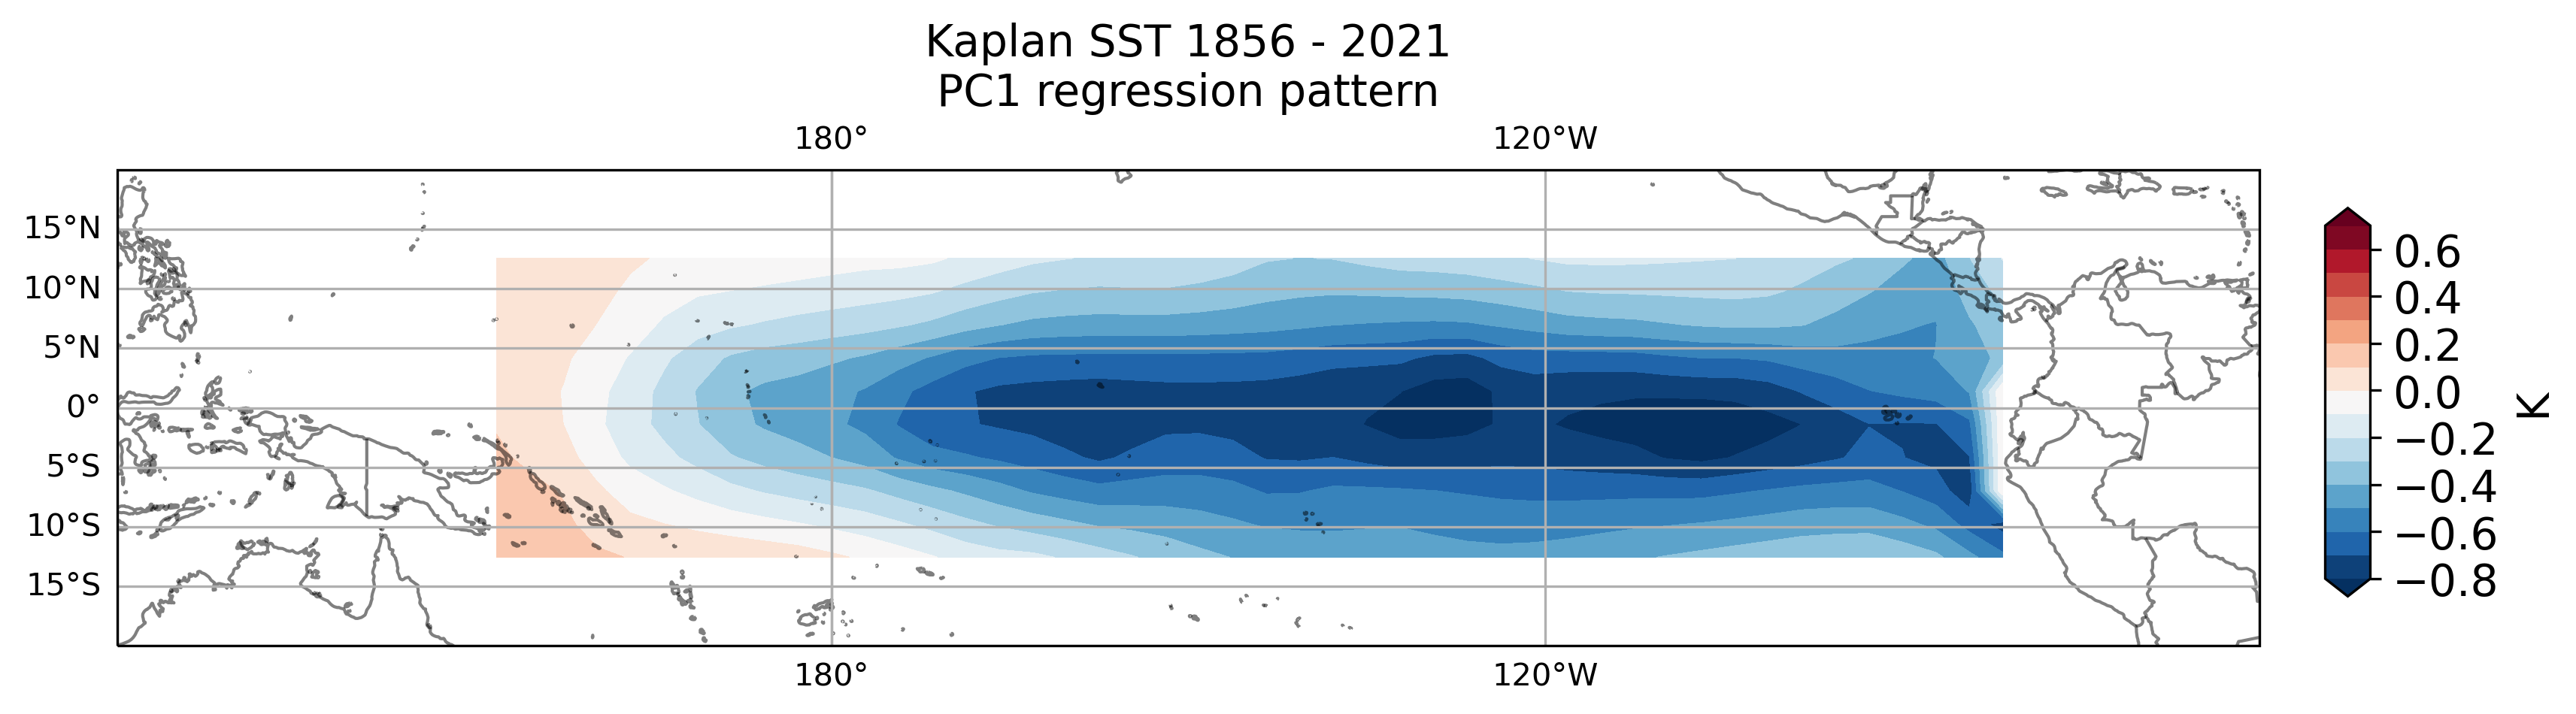

In [66]:
fig = plot_one_sst(patterns.eof1,'Kaplan SST 1856 - 2021 PC1 regression pattern',patterns.eof2.lon,patterns.eof2.lat,[5,-5,180,220])
time_out = year_ini+'_'+year_fin
fig.savefig(path_out+'/plots/kaplan_'+time_out+'_PC1_regression_patterns.png')

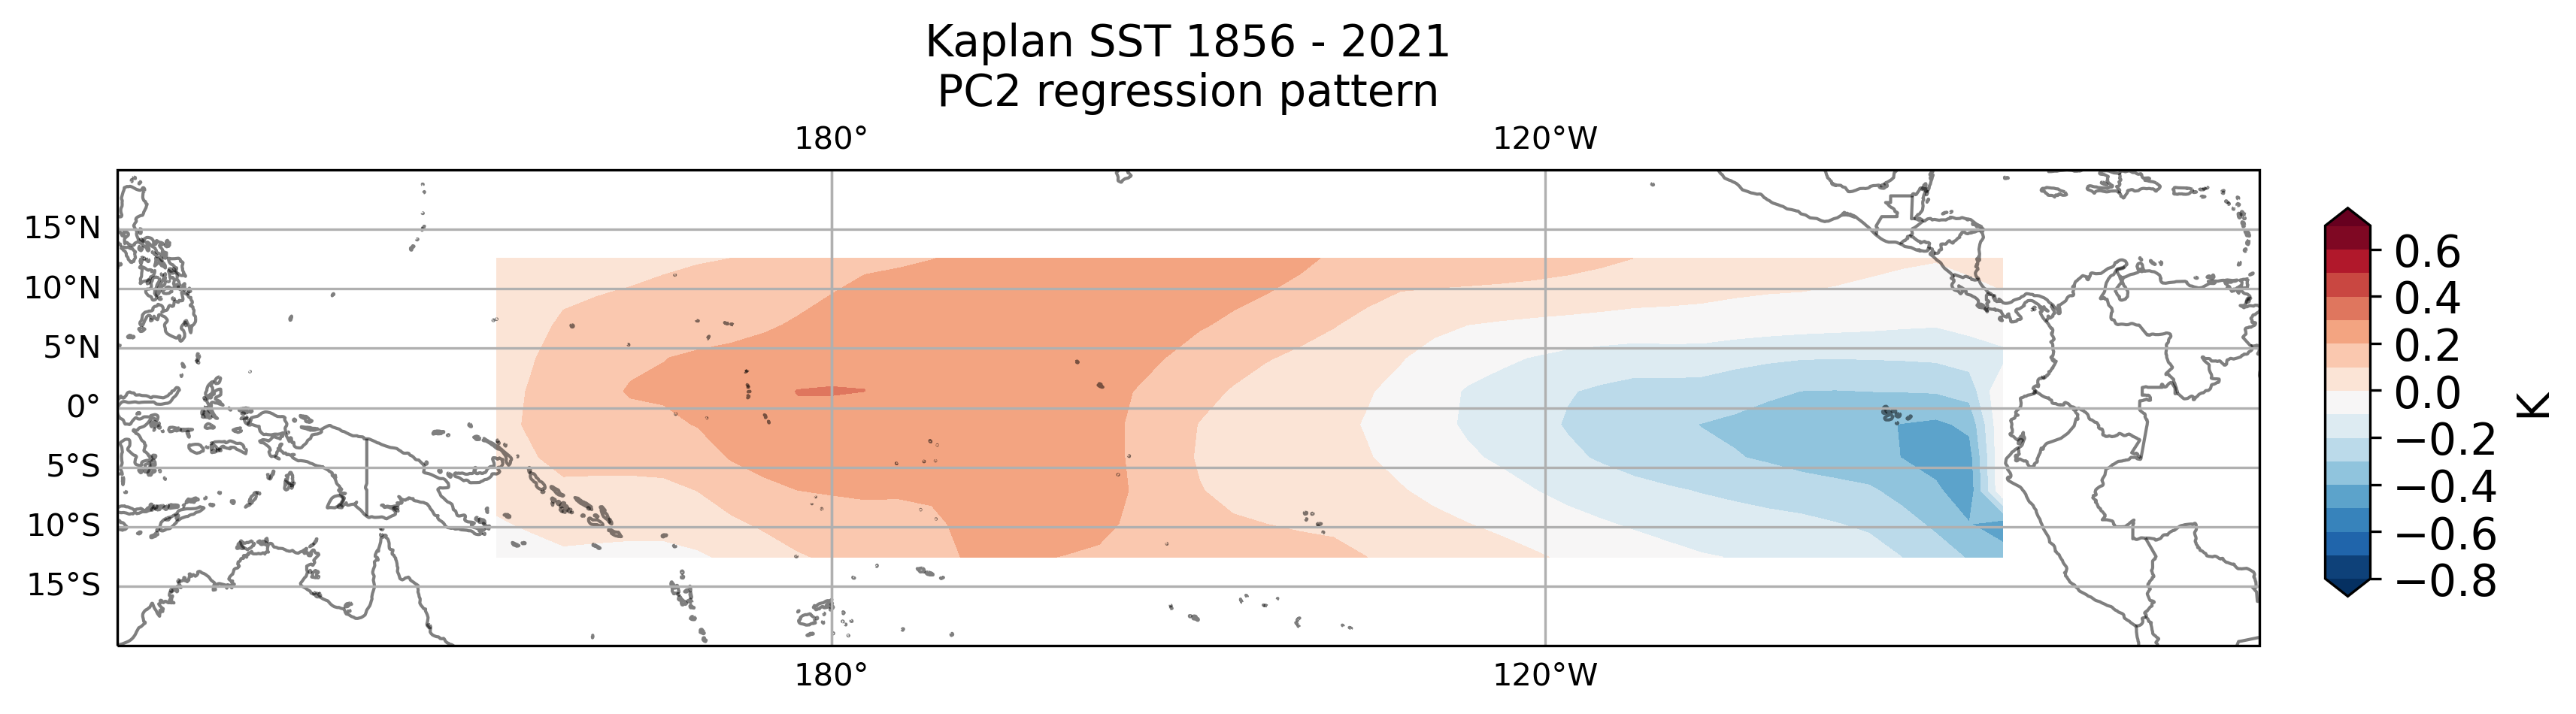

In [67]:
fig = plot_one_sst(patterns.eof2,'Kaplan SST 1856 - 2021 PC2 regression pattern',patterns.eof2.lon,patterns.eof2.lat,[5,-5,180,220])
time_out = year_ini+'_'+year_fin
fig.savefig(path_out+'/plots/kaplan_'+time_out+'_PC2_regression_patterns.png')